In [201]:
#Instalação de bibliotecas
%pip install Graphviz


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
#Bibliotecas em uso
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json

## Importação dos dados
Foram utilizadas 3 bases de dados:
1. Base com os dados de acidentes nos EUA nos anos de 2016 a 2021
2. Base com o número de veículos nos EUA nos anos de 2016 a 2021 por estado
3. Base com a relação das siglas e o nomes do estados nos EUA.

In [2]:
#Dados base dos acidentes
df = pd.read_csv('I:/OneDrive - det.ufc.br/Cursos Extras/Pos Ciencia de Dados e Big Data/TCC-PucMinas/Database/US_Accidents_Dec21_updated.csv')

In [41]:
#Nomes dos estados
df_state = pd.read_csv('I:/OneDrive - det.ufc.br/Cursos Extras/Pos Ciencia de Dados e Big Data/TCC-PucMinas/Database/state_name.csv',sep=';')

In [74]:
df_state.head()

,Estado,Nome
0,AK,Alaska
1,AL,Alabama
2,AR,Arkansas
3,AS,AmericanSamoa
4,AZ,Arizona


In [68]:
#Arquivos com os volumes de veículos por estados
xls = pd.ExcelFile('I:/OneDrive - det.ufc.br/Cursos Extras/Pos Ciencia de Dados e Big Data/TCC-PucMinas/Database/Vehicle Registration US.xlsx')
df_veh2016 = pd.read_excel(xls, sheet_name='2016')
df_veh2017 = pd.read_excel(xls, sheet_name='2017')
df_veh2018 = pd.read_excel(xls, sheet_name='2018')
df_veh2019 = pd.read_excel(xls, sheet_name='2019')
df_veh2020 = pd.read_excel(xls, sheet_name='2020')
df_veh2021 = pd.read_excel(xls, sheet_name='2021')

## Tratamento dos dados
Tratamento dos dados para que estejam prontos para a análise

In [69]:
#Tratanto para o nome dos estados com nome composto estarem sem espaço
df_veh2016['State'] = df_veh2016['State'].str.replace(' ', '')
df_veh2017['State'] = df_veh2017['State'].str.replace(' ', '')
df_veh2018['State'] = df_veh2018['State'].str.replace(' ', '')
df_veh2019['State'] = df_veh2019['State'].str.replace(' ', '')
df_veh2020['State'] = df_veh2020['State'].str.replace(' ', '')
df_veh2021['State'] = df_veh2021['State'].str.replace(' ', '')
#Colocando o ano como uma coluna em cada uma das tabelas
df_veh2016['Ano'] = 2016
df_veh2017['Ano'] = 2017
df_veh2018['Ano'] = 2018
df_veh2019['Ano'] = 2019
df_veh2020['Ano'] = 2020
df_veh2021['Ano'] = 2021
#Modificando o tipo dessa coluna
df_veh2016['Ano'] = pd.to_datetime(df_veh2016['Ano'], format='%Y')
df_veh2017['Ano'] = pd.to_datetime(df_veh2017['Ano'], format='%Y')
df_veh2018['Ano'] = pd.to_datetime(df_veh2018['Ano'], format='%Y')
df_veh2019['Ano'] = pd.to_datetime(df_veh2019['Ano'], format='%Y')
df_veh2020['Ano'] = pd.to_datetime(df_veh2020['Ano'], format='%Y')
df_veh2021['Ano'] = pd.to_datetime(df_veh2021['Ano'], format='%Y')
#Colocando a sigla do estado em todos
df_veh2016 = pd.merge(df_veh2016, df_state, left_on='State', right_on='Nome', how='left')
df_veh2017 = pd.merge(df_veh2017, df_state, left_on='State', right_on='Nome', how='left')
df_veh2018 = pd.merge(df_veh2018, df_state, left_on='State', right_on='Nome', how='left')
df_veh2019 = pd.merge(df_veh2019, df_state, left_on='State', right_on='Nome', how='left')
df_veh2020 = pd.merge(df_veh2020, df_state, left_on='State', right_on='Nome', how='left')
df_veh2021 = pd.merge(df_veh2021, df_state, left_on='State', right_on='Nome', how='left')
#Renomeando o nome da coluna Total
df_veh2016 = df_veh2016.rename(columns={'Total 2016': 'Total_veh'})
df_veh2017 = df_veh2017.rename(columns={'Total 2017': 'Total_veh'})
df_veh2018 = df_veh2018.rename(columns={'Total 2018': 'Total_veh'})
df_veh2019 = df_veh2019.rename(columns={'Total 2019': 'Total_veh'})
df_veh2020 = df_veh2020.rename(columns={'Total 2020': 'Total_veh'})
df_veh2021 = df_veh2021.rename(columns={'Total 2021': 'Total_veh'})
#Criando um dataframe único para ser usado no merge com a tabela principal
df_veh = pd.concat([df_veh2016,df_veh2017,df_veh2018,df_veh2019,df_veh2020,df_veh2021], axis=0)

In [71]:
df_veh_total = df_veh[['Estado','Ano','Total_veh']]

In [75]:
df_veh_total.head()

,Estado,Ano,Total_veh
0,AL,2016-01-01,4382700
1,AK,2016-01-01,636700
2,AZ,2016-01-01,5528100
3,AR,2016-01-01,2547500
4,CA,2016-01-01,30581200


In [63]:
pd.set_option("display.max_columns", 100)
pd.set_option('display.max_rows', 120)

In [76]:
# Transformando as datas para o tipo correto
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

In [169]:
#Criando o dataframe principal com os dados de acidentes
dados_acidentes = df[['Severity', 'Start_Time', 'End_Time', 'Side', 'City', 'County', 'State', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Traffic_Signal', 'Sunrise_Sunset']]
#Coluna com os o ano de refência do acidente
dados_acidentes['Ano'] = dados_acidentes['Start_Time'].dt.to_period('Y').dt.to_timestamp()
dados_acidentes['Mes_ano'] = dados_acidentes['Start_Time'].dt.to_period('M').dt.to_timestamp()
#Coluna com a duracão do acidente
dados_acidentes['Duracao(min)'] = ((dados_acidentes['End_Time'] - dados_acidentes['Start_Time']).dt.total_seconds() / 60).astype(int)

C:\Users\William\AppData\Local\Temp\ipykernel_24868\304219098.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_acidentes['Ano'] = dados_acidentes['Start_Time'].dt.to_period('Y').dt.to_timestamp()
C:\Users\William\AppData\Local\Temp\ipykernel_24868\304219098.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_acidentes['Mes_ano'] = dados_acidentes['Start_Time'].dt.to_period('M').dt.to_timestamp()
C:\Users\William\AppData\Local\Temp\ipykernel_24868\304219098.py:7: SettingWithCopyWarning: 
A val

In [170]:
#Fazendo merge com a tabela com os dados da quantidade de veículos por estado
dados_acidentes_total = pd.merge(dados_acidentes, df_veh_total, left_on=['State', 'Ano'], right_on=['Estado','Ano'], how='left')
dados_acidentes_total.drop('Estado', axis=1, inplace=True)

In [171]:
#Mudando as colunas necessárias para o tipo categórico ordenado
# 1 representa o menos severo
dados_acidentes_total['Severity'] = dados_acidentes_total['Severity'].astype(pd.CategoricalDtype(categories=[1, 2, 3, 4], ordered=True))
# 
dados_acidentes_total['Side'] = dados_acidentes_total['Side'].astype(pd.CategoricalDtype(categories=['R', 'L', 'N']))

In [172]:
#Tratando os valores nulos
# Retirando as linhas com valores nulos de temperatura
dados_acidentes_total = dados_acidentes_total.dropna(subset=['Temperature(F)'])
# Retirando as linhas com valores nulos de Sunrise_Sunset
dados_acidentes_total = dados_acidentes_total.dropna(subset=['Sunrise_Sunset'])
# Retirando as linhas com valores nulos de Wind_Speed(mph)
dados_acidentes_total = dados_acidentes_total.dropna(subset=['Wind_Speed(mph)'])
# Retirando as linhas com valores nulos de Wind_Direction
dados_acidentes_total = dados_acidentes_total.dropna(subset=['Wind_Direction'])
# Retirando as linhas com valores nulos de Visibility(mi) 
dados_acidentes_total = dados_acidentes_total.dropna(subset=['Visibility(mi)'])
# Retirando as linhas com valores nulos de Pressure(in)
dados_acidentes_total = dados_acidentes_total.dropna(subset=['Pressure(in)'])
# Retirando as linhas com valores nulos de Humidity(%)
dados_acidentes_total = dados_acidentes_total.dropna(subset=['Humidity(%)'])

In [173]:
dados_acidentes_total.isnull().sum()


Severity           0
Start_Time         0
End_Time           0
Side               0
City               0
County             0
State              0
Temperature(F)     0
Humidity(%)        0
Pressure(in)       0
Visibility(mi)     0
Wind_Direction     0
Wind_Speed(mph)    0
Traffic_Signal     0
Sunrise_Sunset     0
Ano                0
Mes_ano            0
Duracao(min)       0
Total_veh          0
dtype: int64

In [180]:
#Resetando o index do dataframe
dados_acidentes_total = dados_acidentes_total.reset_index(drop=True)
dados_acidentes_total

,Severity,Start_Time,End_Time,Side,City,County,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Traffic_Signal,Sunrise_Sunset,Ano,Mes_ano,Duracao(min),Total_veh
0,3,2016-02-08 00:37:08,2016-02-08 06:37:08,R,Dublin,Franklin,OH,42.1,58.0,29.76,10.0,SW,10.4,False,Night,2016-01-01,2016-02-01,360,9979600
1,3,2016-02-08 07:53:43,2016-02-08 13:53:43,R,Cincinnati,Hamilton,OH,37.0,93.0,29.69,10.0,WSW,10.4,False,Day,2016-01-01,2016-02-01,360,9979600
2,2,2016-02-08 08:16:57,2016-02-08 14:16:57,R,Williamsburg,Clermont,OH,35.6,100.0,29.66,10.0,WSW,8.1,True,Day,2016-01-01,2016-02-01,360,9979600
3,2,2016-02-08 08:15:41,2016-02-08 14:15:41,R,Dayton,Montgomery,OH,33.8,100.0,29.63,3.0,SW,2.3,False,Day,2016-01-01,2016-02-01,360,9979600
4,2,2016-02-08 11:51:46,2016-02-08 17:51:46,R,Cleveland,Cuyahoga,OH,33.1,92.0,29.63,0.5,SW,3.5,False,Day,2016-01-01,2016-02-01,360,9979600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662379,2,2019-08-23 18:03:25,2019-08-23 18:32:01,R,Riverside,Riverside,CA,86.0,40.0,28.92,10.0,W,13.0,False,Day,2019-01-01,2019-08-01,28,33535000
2662380,2,2019-08-23 19:11:30,2019-08-23 19:38:23,R,San Diego,San Diego,CA,70.0,73.0,29.39,10.0,SW,6.0,False,Day,2019-01-01,2019-08-01,26,33535000
2662381,2,2019-08-23 19:00:21,2019-08-23 19:28:49,R,Orange,Orange,CA,73.0,64.0,29.74,10.0,SSW,10.0,False,Day,2019-01-01,2019-08-01,28,33535000
2662382,2,2019-08-23 19:00:21,2019-08-23 19:29:42,R,Culver City,Los Angeles,CA,71.0,81.0,29.62,10.0,SW,8.0,False,Day,2019-01-01,2019-08-01,29,33535000


In [179]:
dados_acidentes_total

,Severity,Start_Time,End_Time,Side,City,County,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Traffic_Signal,Sunrise_Sunset,Ano,Mes_ano,Duracao(min),Total_veh
0,3,2016-02-08 00:37:08,2016-02-08 06:37:08,R,Dublin,Franklin,OH,42.1,58.0,29.76,10.0,SW,10.4,False,Night,2016-01-01,2016-02-01,360,9979600
1,3,2016-02-08 07:53:43,2016-02-08 13:53:43,R,Cincinnati,Hamilton,OH,37.0,93.0,29.69,10.0,WSW,10.4,False,Day,2016-01-01,2016-02-01,360,9979600
2,2,2016-02-08 08:16:57,2016-02-08 14:16:57,R,Williamsburg,Clermont,OH,35.6,100.0,29.66,10.0,WSW,8.1,True,Day,2016-01-01,2016-02-01,360,9979600
3,2,2016-02-08 08:15:41,2016-02-08 14:15:41,R,Dayton,Montgomery,OH,33.8,100.0,29.63,3.0,SW,2.3,False,Day,2016-01-01,2016-02-01,360,9979600
4,2,2016-02-08 11:51:46,2016-02-08 17:51:46,R,Cleveland,Cuyahoga,OH,33.1,92.0,29.63,0.5,SW,3.5,False,Day,2016-01-01,2016-02-01,360,9979600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662379,2,2019-08-23 18:03:25,2019-08-23 18:32:01,R,Riverside,Riverside,CA,86.0,40.0,28.92,10.0,W,13.0,False,Day,2019-01-01,2019-08-01,28,33535000
2662380,2,2019-08-23 19:11:30,2019-08-23 19:38:23,R,San Diego,San Diego,CA,70.0,73.0,29.39,10.0,SW,6.0,False,Day,2019-01-01,2019-08-01,26,33535000
2662381,2,2019-08-23 19:00:21,2019-08-23 19:28:49,R,Orange,Orange,CA,73.0,64.0,29.74,10.0,SSW,10.0,False,Day,2019-01-01,2019-08-01,28,33535000
2662382,2,2019-08-23 19:00:21,2019-08-23 19:29:42,R,Culver City,Los Angeles,CA,71.0,81.0,29.62,10.0,SW,8.0,False,Day,2019-01-01,2019-08-01,29,33535000


In [181]:
dados_acidentes_total['Severity'].value_counts()

2    2388268
3     136151
4     112429
1      25536
Name: Severity, dtype: int64

## Limpeza de dados (Data cleaning)


## Exploração de dados
Exploração inicial dos dados de acidentes nos EUA

In [4]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [7]:
#Formato do dataframe
print('A fonte de dados contem linhas: {:,d} e colunas: {}'.format(df.shape[0], df.shape[1]))

A fonte de dados contem linhas: 2,845,342 e colunas: 47


In [15]:
#Colunas de dados disponíveis
df.columns
for n in range(len(df.columns)):
    print('Dados sobre: {}'.format(df.columns[n]))

Dados sobre: ID
Dados sobre: Severity
Dados sobre: Start_Time
Dados sobre: End_Time
Dados sobre: Start_Lat
Dados sobre: Start_Lng
Dados sobre: End_Lat
Dados sobre: End_Lng
Dados sobre: Distance(mi)
Dados sobre: Description
Dados sobre: Number
Dados sobre: Street
Dados sobre: Side
Dados sobre: City
Dados sobre: County
Dados sobre: State
Dados sobre: Zipcode
Dados sobre: Country
Dados sobre: Timezone
Dados sobre: Airport_Code
Dados sobre: Weather_Timestamp
Dados sobre: Temperature(F)
Dados sobre: Wind_Chill(F)
Dados sobre: Humidity(%)
Dados sobre: Pressure(in)
Dados sobre: Visibility(mi)
Dados sobre: Wind_Direction
Dados sobre: Wind_Speed(mph)
Dados sobre: Precipitation(in)
Dados sobre: Weather_Condition
Dados sobre: Amenity
Dados sobre: Bump
Dados sobre: Crossing
Dados sobre: Give_Way
Dados sobre: Junction
Dados sobre: No_Exit
Dados sobre: Railway
Dados sobre: Roundabout
Dados sobre: Station
Dados sobre: Stop
Dados sobre: Traffic_Calming
Dados sobre: Traffic_Signal
Dados sobre: Turning_

In [16]:
#Tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [18]:
#Verificando valores nulos
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

- Retirando as colunas que não serão utilizadas e as linhas com valores nulos.
- Colunas que serão utilizadas: Severity, Start_Time, End_Time, Side, City, County, State, Temperature(F), Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi), Wind_Direction, Wind_Speed(mph), Precipitation(in), Traffic_Signal, Sunrise_Sunset

In [54]:
#Colunas de dados utilizados
dados_acidentes.columns
for n in range(len(dados_acidentes.columns)):
    print('Dados sobre: {}'.format(dados_acidentes.columns[n]))

Dados sobre: Severity
Dados sobre: Start_Time
Dados sobre: End_Time
Dados sobre: Side
Dados sobre: City
Dados sobre: County
Dados sobre: State
Dados sobre: Temperature(F)
Dados sobre: Wind_Chill(F)
Dados sobre: Humidity(%)
Dados sobre: Pressure(in)
Dados sobre: Visibility(mi)
Dados sobre: Wind_Direction
Dados sobre: Wind_Speed(mph)
Dados sobre: Precipitation(in)
Dados sobre: Traffic_Signal
Dados sobre: Sunrise_Sunset


In [55]:
#Formato do dataframe
print('A fonte de dados contem linhas: {:,d} e colunas: {}'.format(dados_acidentes.shape[0], dados_acidentes.shape[1]))

A fonte de dados contem linhas: 2,775,934 e colunas: 17


In [47]:
dados_acidentes.isnull().sum()

Severity                  0
Start_Time                0
End_Time                  0
Side                      0
City                      0
County                    0
State                     0
Temperature(F)            0
Wind_Chill(F)        400343
Humidity(%)            3818
Pressure(in)           2790
Visibility(mi)        12354
Wind_Direction        17194
Wind_Speed(mph)       97776
Precipitation(in)    493224
Traffic_Signal            0
Sunrise_Sunset         2148
dtype: int64

In [44]:
dados_acidentes.dropna(subset=['City'], inplace=True)


C:\Users\William\AppData\Local\Temp\ipykernel_10448\3555834369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_acidentes.dropna(subset=['City'], inplace=True)


In [46]:
dados_acidentes.dropna(subset=['Temperature(F)'], inplace=True)

C:\Users\William\AppData\Local\Temp\ipykernel_10448\589492335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_acidentes.dropna(subset=['Temperature(F)'], inplace=True)


In [48]:
dados_acidentes.isnull().sum()

Severity                  0
Start_Time                0
End_Time                  0
Side                      0
City                      0
County                    0
State                     0
Temperature(F)            0
Wind_Chill(F)        400343
Humidity(%)            3818
Pressure(in)           2790
Visibility(mi)        12354
Wind_Direction        17194
Wind_Speed(mph)       97776
Precipitation(in)    493224
Traffic_Signal            0
Sunrise_Sunset         2148
dtype: int64

In [53]:
dados_acidentes.nunique()

Severity                   4
Start_Time           1771155
End_Time             2191907
Side                       2
City                   11412
County                  1702
State                     49
Temperature(F)           788
Wind_Chill(F)            897
Humidity(%)              100
Pressure(in)            1066
Visibility(mi)            75
Wind_Direction            24
Wind_Speed(mph)          135
Precipitation(in)        230
Traffic_Signal             2
Sunrise_Sunset             2
dtype: int64

- Dados sobre o volume de carros registrado por estado dos EUA nos anos de 2016 a 2021. 

https://afdc.energy.gov/vehicle-registration?year=2016

In [51]:
df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [50]:
df.nunique()

ID                       2845342
Severity                       4
Start_Time               1807311
End_Time                 2239983
Start_Lat                1093618
Start_Lng                1120365
End_Lat                  1080811
End_Lng                  1105404
Distance(mi)               14165
Description              1174563
Number                     46402
Street                    159651
Side                           3
City                       11681
County                      1707
State                         49
Zipcode                   363085
Country                        1
Timezone                       4
Airport_Code                2004
Weather_Timestamp         474214
Temperature(F)               788
Wind_Chill(F)                897
Humidity(%)                  100
Pressure(in)                1068
Visibility(mi)                76
Wind_Direction                24
Wind_Speed(mph)              136
Precipitation(in)            230
Weather_Condition            127
Amenity   

In [24]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [52]:
#Agrupar por cidades
df_cidade = pd.DataFrame(df['City'].value_counts()).reset_index().rename(columns={'index':'Cidade', 'City':'Acidentes'})
df_cidade.head(-5)

,Cidade,Acidentes
0,Miami,106966
1,Los Angeles,68956
2,Orlando,54691
3,Dallas,41979
4,Houston,39448
...,...,...
11671,Linn,1
11672,Stella,1
11673,York New Salem,1
11674,Algona,1


In [66]:
#Agrupar por estados
#Agrupar por cidades
df_estado = pd.DataFrame(df['State'].value_counts()).reset_index().rename(columns={'index':'Estado', 'City':'Acidentes'})
df_estado.head(10)

,Estado,State
0,CA,795868
1,FL,401388
2,TX,149037
3,OR,126341
4,VA,113535
5,NY,108049
6,PA,99975
7,MN,97185
8,NC,91362
9,SC,89216


In [67]:
#Nomes dos estados
df_state = pd.read_csv('I:/OneDrive - det.ufc.br/Cursos Extras/Pos Ciencia de Dados e Big Data/TCC-PucMinas/Database/state_name.csv',sep=';')

In [68]:
df_state.head()

,Estado,Nome
0,AK,Alaska
1,AL,Alabama
2,AR,Arkansas
3,AS,AmericanSamoa
4,AZ,Arizona


In [73]:
df_estado = pd.merge(df_estado, df_state, on='Estado')
# df_estado.drop(['state_x','name_x','state_y,','name_y' axis=1, inplace=True)
df_estado.drop('Nome_y', axis=1, inplace=True)
df_estado

,Estado,State,Nome
0,CA,795868,California
1,FL,401388,Florida
2,TX,149037,Texas
3,OR,126341,Oregon
4,VA,113535,Virginia
5,NY,108049,NewYork
6,PA,99975,Pennsylvania
7,MN,97185,Minnesota
8,NC,91362,NorthCarolina
9,SC,89216,SouthCarolina


In [74]:
df.value_counts("Severity")

Severity
2    2532991
3     155105
4     131193
1      26053
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

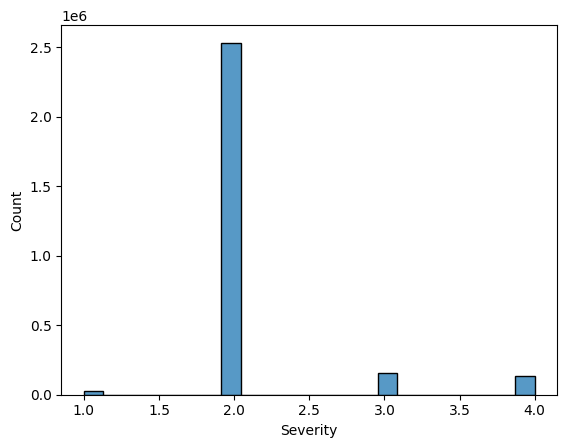

In [64]:
sns.histplot(data=df, x="Severity")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

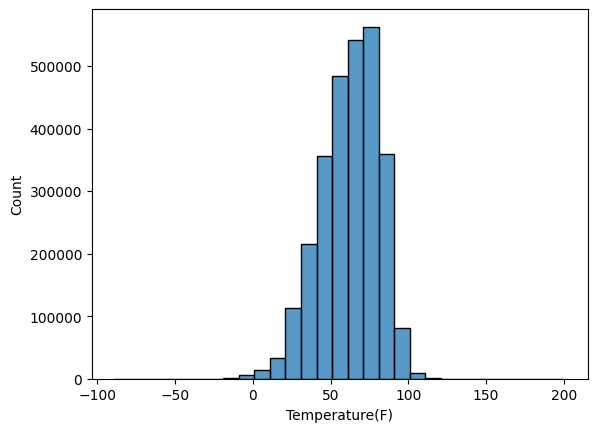

In [76]:
sns.histplot(data=df, x="Temperature(F)",binwidth=10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

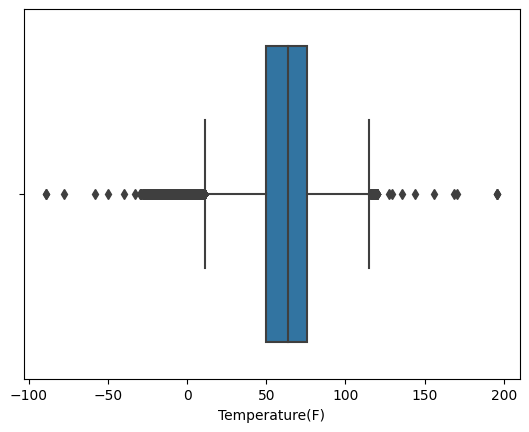

In [13]:
sns.boxplot(data=df, x="Temperature(F)")
plt.show

In [12]:
df.value_counts("Weather_Condition") 	

Weather_Condition
Fair                         1107194
Mostly Cloudy                 363959
Cloudy                        348767
Partly Cloudy                 249939
Clear                         173823
                              ...   
Low Drifting Snow                  1
Light Fog                          1
Mist / Windy                       1
Sand / Dust Whirls Nearby          1
Sleet / Windy                      1
Length: 127, dtype: int64

<Axes: xlabel='Severity', ylabel='Temperature(F)'>

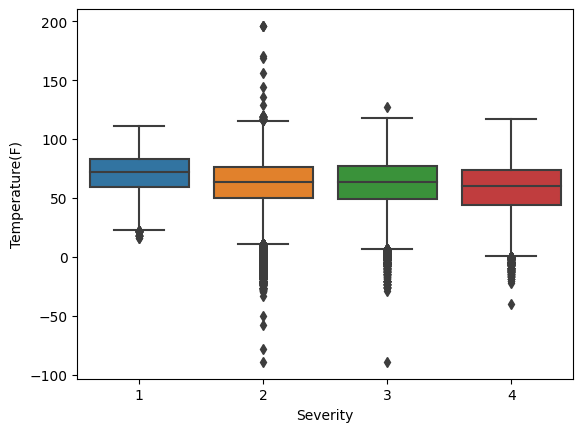

In [14]:
sns.boxplot(data=df, x='Severity', y='Temperature(F)')

<Axes: xlabel='Side', ylabel='Temperature(F)'>

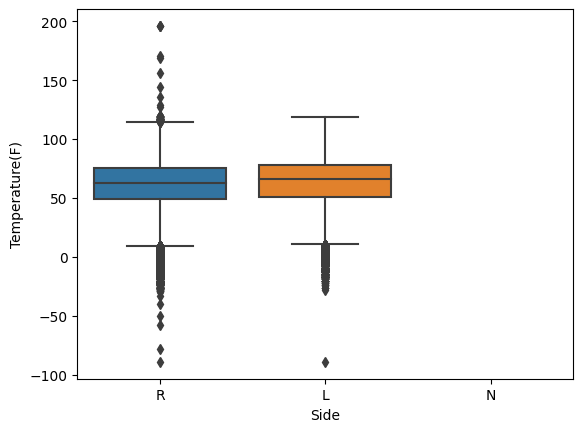

In [17]:
sns.boxplot(data=df, x='Side', y='Temperature(F)')

In [15]:
df.groupby('Severity').agg(media_temp=('Temperature(F)','mean'))

,media_temp
Severity,
1,71.257955
2,61.868632
3,61.920769
4,58.275355


In [27]:
#Colunas com infos de mes e ano
df['Data_mes'] = pd.to_datetime(df['Start_Time'], format='%m/%yyyy')
df['Data_ano'] = pd.to_datetime(df['Start_Time'], format='%yyyy')

In [35]:
df_grouped = df.groupby(pd.Grouper(key='Start_Time', freq='M')).mean()

C:\Users\William\AppData\Local\Temp\ipykernel_9616\4199387081.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(pd.Grouper(key='Start_Time', freq='M')).mean()


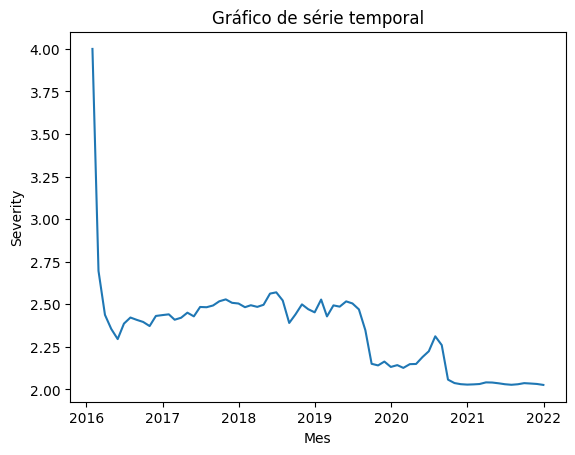

In [37]:
sns.lineplot(data=df_grouped, x='Start_Time', y='Severity')
plt.xlabel('Mes')
plt.ylabel('Severity')
plt.title('Gráfico de série temporal')
plt.show()

In [34]:
df_grouped.index

DatetimeIndex(['2016-01-14 20:18:33', '2016-02-08 00:37:08',
               '2016-02-08 05:56:20', '2016-02-08 06:15:39',
               '2016-02-08 06:51:45', '2016-02-08 07:53:43',
               '2016-02-08 08:15:41', '2016-02-08 08:16:57',
               '2016-02-08 11:51:46', '2016-02-08 14:19:57',
               ...
               '2021-12-31 22:36:13', '2021-12-31 22:37:00',
               '2021-12-31 22:37:11', '2021-12-31 22:39:30',
               '2021-12-31 22:40:00', '2021-12-31 22:41:00',
               '2021-12-31 22:42:00', '2021-12-31 23:22:00',
               '2021-12-31 23:26:30', '2021-12-31 23:30:00'],
              dtype='datetime64[ns]', name='Data_mes', length=1807311, freq=None)

In [221]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


## DataSet das informações por localização (WebScrapping)

In [181]:
locations = [
    {'latitude': 40.100006, 'longitude': -83.1, 'datahora': '2016-02-08T08:00'},
    {'latitude': 39.9612, 'longitude': -82.9988, 'datahora': '2016-02-08T09:00'},
    {'latitude': 41.8781, 'longitude': -87.6298, 'datahora': '2016-02-08T10:00'}]
data = {
    'latitude': [loc['latitude'] for loc in locations],
    'longitude': [loc['longitude'] for loc in locations],
    'datahora': [loc['datahora'] for loc in locations],
    'temperatura': []}

In [209]:
df_request = pd.DataFrame()
df_request["Latitude"] = df["Start_Lat"]
df_request["Longitude"] = df["Start_Lng"]
df_request["Time"] = pd.to_datetime(df["Start_Time"]).dt.strftime("%Y-%m-%d")

In [211]:
len(df_request)

2845342

In [214]:
df_request.head()

,Latitude,Longitude,Time
0,40.108910,-83.092860,2016-02-08
1,39.865420,-84.062800,2016-02-08
2,39.102660,-84.524680,2016-02-08
3,41.062130,-81.537840,2016-02-08
4,39.172393,-84.492792,2016-02-08


In [212]:
df_request = df_request.drop_duplicates()

In [216]:
len(df_request)

2437913

In [220]:
df_request.head(3)

,Latitude,Longitude,Time
0,40.10891,-83.09286,2016-02-08
1,39.86542,-84.06280,2016-02-08
2,39.10266,-84.52468,2016-02-08


In [197]:

request = requests.get(f'https://archive-api.open-meteo.com/v1/archive?latitude={}40.108910&longitude=-83.092860&start_date=2016-02-08&end_date=2016-02-08&hourly=apparent_temperature&hourly=precipitation')
df_request = request.json()
df_request

{'latitude': 40.100006,
 'longitude': -83.1,
 'generationtime_ms': 0.6209611892700195,
 'utc_offset_seconds': 0,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'elevation': 270.0,
 'hourly_units': {'time': 'iso8601',
  'apparent_temperature': '°C',
  'precipitation': 'mm'},
 'hourly': {'time': ['2016-02-08T00:00',
   '2016-02-08T01:00',
   '2016-02-08T02:00',
   '2016-02-08T03:00',
   '2016-02-08T04:00',
   '2016-02-08T05:00',
   '2016-02-08T06:00',
   '2016-02-08T07:00',
   '2016-02-08T08:00',
   '2016-02-08T09:00',
   '2016-02-08T10:00',
   '2016-02-08T11:00',
   '2016-02-08T12:00',
   '2016-02-08T13:00',
   '2016-02-08T14:00',
   '2016-02-08T15:00',
   '2016-02-08T16:00',
   '2016-02-08T17:00',
   '2016-02-08T18:00',
   '2016-02-08T19:00',
   '2016-02-08T20:00',
   '2016-02-08T21:00',
   '2016-02-08T22:00',
   '2016-02-08T23:00'],
  'apparent_temperature': [3.2,
   2.8,
   2.0,
   1.0,
   1.1,
   1.1,
   1.0,
   0.9,
   0.2,
   -0.3,
   -0.5,
   -0.5,
   -0.6,
   -1.0,
   -1.

In [ ]:
# Cria um novo dataframe vazio
result_df = pd.DataFrame()

# Itera sobre as linhas do dataframe
for index, row in df.iterrows():
    latitude = row["latitude"]
    longitude = row["longitude"]
    date = row["datetime"].strftime("%Y-%m-%d") # Converte a data para o formato esperado pela API
    url = f'https://archive-api.open-meteo.com/v1/archive?latitude={latitude}&longitude={longitude}&start_date={date}&end_date={date}&hourly=apparent_temperature&hourly=precipitation'
    response = requests.get(url)
    # Processa a resposta aqui
    data = response.json() # Converte a resposta em um dicionário Python
    # Extrai os valores desejados do dicionário
    temperature = data["data"][0]["apparent_temperature"]
    precipitation = data["data"][0]["precipitation"]
    # Cria um novo dicionário com os valores extraídos
    result = {"latitude": latitude, "longitude": longitude, "date": date, "apparent_temperature": temperature, "precipitation": precipitation}
    # Adiciona o novo dicionário ao dataframe de resultados
    result_df = result_df.append(result, ignore_index=True)

In [201]:
# carrega o json como um dicionário
# dados_json = '{"latitude": 40.100006, "longitude": -83.1, "generationtime_ms": 0.41496753692626953, "utc_offset_seconds": 0, "timezone": "GMT", "timezone_abbreviation": "GMT", "elevation": 270.0, "hourly_units": {"time": "iso8601", "apparent_temperature": "°C", "precipitation": "mm"}, "hourly": {"time": ["2016-02-08T00:00", "2016-02-08T01:00"], "apparent_temperature": [3.2, 2.8], "precipitation": [0.0, 0.0]}}'
dados_dict = (df_request)

# cria um DataFrame a partir do dicionário
df_temp_prec = pd.DataFrame(dados_dict['hourly'])

# verifica se os valores de temperatura e precipitação são listas
if isinstance(df_temp_prec['time'][0], list):
    df_temp_prec['time'] = df_temp_prec['time'].apply(lambda x: x[0])
if isinstance(df_temp_prec['apparent_temperature'][0], list):
    df_temp_prec['apparent_temperature'] = df_temp_prec['apparent_temperature'].apply(lambda x: x[0])
if isinstance(df_temp_prec['precipitation'][0], list):
    df_temp_prec['precipitation'] = df_temp_prec['precipitation'].apply(lambda x: x[0])

# adiciona as informações do tempo ao DataFrame
df_temp_prec['latitude'] = dados_dict['latitude']
df_temp_prec['longitude'] = dados_dict['longitude']

# reorganiza as colunas do DataFrame
df_temp_prec = df_temp_prec[['latitude', 'longitude','time', 'apparent_temperature', 'precipitation']]

# exibe o DataFrame resultante
print(df_temp_prec)

     latitude  longitude              time  apparent_temperature  \
0   40.100006      -83.1  2016-02-08T00:00                   3.2   
1   40.100006      -83.1  2016-02-08T01:00                   2.8   
2   40.100006      -83.1  2016-02-08T02:00                   2.0   
3   40.100006      -83.1  2016-02-08T03:00                   1.0   
4   40.100006      -83.1  2016-02-08T04:00                   1.1   
5   40.100006      -83.1  2016-02-08T05:00                   1.1   
6   40.100006      -83.1  2016-02-08T06:00                   1.0   
7   40.100006      -83.1  2016-02-08T07:00                   0.9   
8   40.100006      -83.1  2016-02-08T08:00                   0.2   
9   40.100006      -83.1  2016-02-08T09:00                  -0.3   
10  40.100006      -83.1  2016-02-08T10:00                  -0.5   
11  40.100006      -83.1  2016-02-08T11:00                  -0.5   
12  40.100006      -83.1  2016-02-08T12:00                  -0.6   
13  40.100006      -83.1  2016-02-08T13:00      

In [1]:
dados_dict

NameError: name 'dados_dict' is not defined

In [148]:
data = json.loads(df_request.text)

AttributeError: 'dict' object has no attribute 'text'

## Início do modelo de machine learning
Utilizar 3 modelos diferentes
- Clusterização
- Predição do nível de severidade
- Probabilidade do nível de severidade

Aqui estão três sugestões de técnicas de Machine Learning que podem ser usadas para clusterização e predição da severidade dos acidentes de trânsito:

Random Forests (RF): É um algoritmo de aprendizado supervisionado que pode ser usado tanto para classificação quanto para regressão. Ele constrói várias árvores de decisão e combina suas previsões para obter resultados mais precisos e estáveis 1.

Logistic Regression (LR): É um algoritmo de aprendizado supervisionado usado principalmente para problemas de classificação binária. Ele usa uma função logística para modelar a probabilidade de uma observação pertencer a uma das duas classes 1.

Naive Bayes (NB): É um algoritmo de aprendizado supervisionado baseado no teorema de Bayes. Ele assume que as características são independentes entre si e calcula a probabilidade de cada classe dado um conjunto de características 2.

Essas são apenas algumas sugestões, existem muitas outras técnicas que também podem ser usadas dependendo do seu conjunto de dados e do problema específico que você está tentando resolver.

In [ ]:
#Random Forests (RF)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carregue seus dados aqui
X = ... # características
y = ... # rótulos

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crie o modelo Random Forests
rf = RandomForestClassifier(n_estimators=100)

# Treine o modelo com os dados de treinamento
rf.fit(X_train, y_train)

# Faça previsões com os dados de teste
y_pred = rf.predict(X_test)

# Calcule a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

#Este código carrega um conjunto de dados com características X e rótulos y, divide os dados em conjuntos de treinamento e 
# teste e cria um modelo Random Forests com 100 árvores. O modelo é então treinado com os dados de treinamento e usado para fazer previsões com os dados de teste. 
# Finalmente, a acurácia do modelo é calculada comparando as previsões com os rótulos verdadeiros.

In [182]:
dados_acidentes_total.dtypes

Severity                 category
Start_Time         datetime64[ns]
End_Time           datetime64[ns]
Side                     category
City                       object
County                     object
State                      object
Temperature(F)            float64
Humidity(%)               float64
Pressure(in)              float64
Visibility(mi)            float64
Wind_Direction             object
Wind_Speed(mph)           float64
Traffic_Signal               bool
Sunrise_Sunset             object
Ano                datetime64[ns]
Mes_ano            datetime64[ns]
Duracao(min)                int32
Total_veh                   int64
dtype: object

In [147]:
X['Side'].value_counts()

R    2353309
L     492032
N          1
Name: Side, dtype: int64

In [184]:
X.dtypes

Severity                      category
Start_Time              datetime64[ns]
End_Time                datetime64[ns]
City                            object
County                          object
Temperature(F)                 float64
Humidity(%)                    float64
Pressure(in)                   float64
Visibility(mi)                 float64
Wind_Direction                  object
Wind_Speed(mph)                float64
Ano                     datetime64[ns]
Mes_ano                 datetime64[ns]
Duracao(min)                     int32
Total_veh                        int64
Side_R                           uint8
Side_L                           uint8
Side_N                           uint8
State_AL                         uint8
State_AR                         uint8
State_AZ                         uint8
State_CA                         uint8
State_CO                         uint8
State_CT                         uint8
State_DC                         uint8
State_DE                 

In [195]:
#Random Forests (RF)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns

# Carregue seus dados aqui
dados_acidentes_encoded = dados_acidentes_total[['Side','State','Temperature(F)','Humidity(%)','Pressure(in)',
                            'Visibility(mi)','Wind_Speed(mph)','Traffic_Signal','Sunrise_Sunset',
                            'Duracao(min)','Total_veh']] # características
dados_acidentes_encoded = pd.get_dummies(dados_acidentes_encoded, columns=['Side','State','Traffic_Signal','Sunrise_Sunset'])
X = dados_acidentes_encoded
y = dados_acidentes_total['Severity'] # rótulos

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crie o modelo Random Forests
rf = RandomForestClassifier(n_estimators=50)

# Calcule as pontuações de validação cruzada
scores = cross_val_score(rf, X_train, y_train, cv=5)
print(f'Pontuações de validação cruzada: {scores}')

Pontuações de validação cruzada: [0.91776648 0.91738618 0.91725922 0.91758553 0.91762543]


In [198]:
# Defina os valores dos hiperparâmetros a serem testados
param_grid = {
    'n_estimators': [10, 50],# 100],
    'max_depth': [None, 10], #20, 25],
    'min_samples_split': [2, 5],# 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crie o objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid)

# Ajuste o GridSearchCV aos dados de treinamento
grid_search.fit(X_train, y_train)

# Exiba os melhores hiperparâmetros encontrados
print(f'Melhores hiperparâmetros: {grid_search.best_params_}')

Melhores hiperparâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [199]:
# Crie um novo modelo Random Forests com os melhores hiperparâmetros encontrados
best_rf = RandomForestClassifier(**grid_search.best_params_)

# Treine o novo modelo com os dados de treinamento
best_rf.fit(X_train, y_train)

# Faça previsões com os dados de teste
y_pred = best_rf.predict(X_test)

# Calcule a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia modelo Random Forests (RF): {accuracy}')

Acurácia modelo Random Forests (RF): 0.9198538152821624


<Axes: >

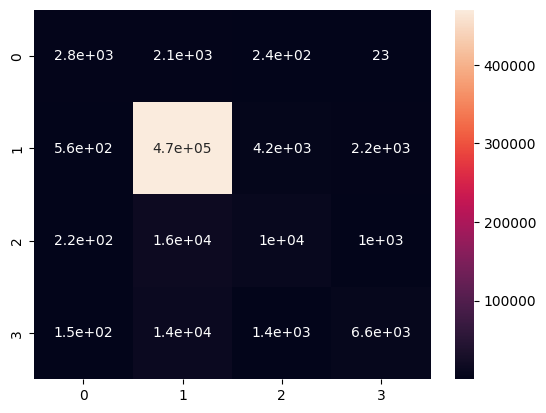

In [203]:
# Calcule a matriz de confusão
conf_mat = confusion_matrix(y_test, y_pred)

# Visualize a matriz de confusão usando Seaborn
sns.heatmap(conf_mat, annot=True)

In [204]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_true = [0, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1]

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Precisão: 1.00
Recall: 0.67
F1-score: 0.80


In [ ]:
# Escolha uma árvore do modelo Random Forests
estimator = best_rf.estimators_[0]

# Exporte a árvore em formato DOT
dot_data = export_graphviz(estimator, out_file=None)

# Gere a imagem da árvore usando o Graphviz
graph = graphviz.Source(dot_data)
graph.render("tree")


Os hiperparâmetros são parâmetros do modelo que não são aprendidos a partir dos dados, mas são definidos pelo usuário antes do treinamento do modelo. Eles controlam vários aspectos do modelo e podem ter um impacto significativo no desempenho do modelo.

Aqui está o que cada um dos hiperparâmetros do modelo Random Forests significa:

n_estimators: O número de árvores na floresta. Quanto maior o número de árvores, mais robusto será o modelo, mas também mais lento para treinar e fazer previsões.

max_depth: A profundidade máxima das árvores. Isso controla o quão complexas as árvores podem ser. Valores maiores podem levar a um ajuste excessivo (overfitting) dos dados de treinamento.

min_samples_split: O número mínimo de amostras necessárias para dividir um nó interno. Isso controla o quão detalhadas as árvores podem ser. Valores maiores podem levar a árvores mais simples e menos propensas a ajuste excessivo.

min_samples_leaf: O número mínimo de amostras necessárias para estar em um nó folha. Isso controla o tamanho das folhas das árvores. Valores maiores podem levar a árvores mais simples e menos propensas a ajuste excessivo.

Esses são apenas alguns dos hiperparâmetros disponíveis para o modelo Random Forests. Você pode consultar a documentação do scikit-learn para obter uma lista completa dos hiperparâmetros e suas descrições.

In [193]:
from sklearn.model_selection import GridSearchCV

# Defina os valores dos hiperparâmetros a serem testados
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crie o objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid)

# Ajuste o GridSearchCV aos dados de treinamento
grid_search.fit(X_train, y_train)

# Exiba os melhores hiperparâmetros encontrados
print(f'Melhores hiperparâmetros: {grid_search.best_params_}')

KeyboardInterrupt: 

In [186]:
#Logistic Regression (LR)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carregue seus dados aqui
dados_acidentes_encoded = dados_acidentes_total[['Side','State','Temperature(F)','Humidity(%)','Pressure(in)',
                            'Visibility(mi)','Wind_Speed(mph)','Traffic_Signal','Sunrise_Sunset',
                            'Duracao(min)','Total_veh']] # características
dados_acidentes_encoded = pd.get_dummies(dados_acidentes_encoded, columns=['Side','State','Traffic_Signal','Sunrise_Sunset'])
X = dados_acidentes_encoded
y = dados_acidentes_total['Severity'] # rótulos

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crie o modelo Logistic Regression
lr = LogisticRegression()

# Treine o modelo com os dados de treinamento
lr.fit(X_train, y_train)

# Faça previsões com os dados de teste
y_pred = lr.predict(X_test)

# Calcule a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

# Este código carrega um conjunto de dados com características X e rótulos y, divide os dados em conjuntos de treinamento e teste e cria um modelo Logistic Regression. 
# O modelo é então treinado com os dados de treinamento e usado para fazer previsões com os dados de teste. 
# Finalmente, a acurácia do modelo é calculada comparando as previsões com os rótulos verdadeiros.

Acurácia: 0.8971542432818694


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Carregue seus dados aqui
dados_acidentes_encoded = dados_acidentes_total[['Side','State','Temperature(F)','Humidity(%)','Pressure(in)',
                            'Visibility(mi)','Wind_Speed(mph)','Traffic_Signal','Sunrise_Sunset',
                            'Duracao(min)','Total_veh']] # características
dados_acidentes_encoded = pd.get_dummies(dados_acidentes_encoded, columns=['Side','State','Traffic_Signal','Sunrise_Sunset'])
X = dados_acidentes_encoded
y = dados_acidentes_total['Severity'] # rótulos

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crie o modelo Logistic Regression
lr = LogisticRegression()

# Defina os hiperparâmetros a serem ajustados
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

# Crie o objeto GridSearchCV
grid_search = GridSearchCV(lr, param_grid)

# Treine o modelo com os dados de treinamento e ajuste os hiperparâmetros
grid_search.fit(X_train, y_train)

# Faça previsões com os dados de teste
y_pred = grid_search.predict(X_test)

# Calcule a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

# Calcule a matriz de confusão
confusion_mtx = confusion_matrix(y_test, y_pred)
print(f'Matriz de confusão: \n{confusion_mtx}')

# Visualize a matriz de confusão
sns.heatmap(confusion_mtx, annot=True)
plt.show()

# Calcule a pontuação de validação cruzada com 5 divisões
scores = cross_val_score(lr, X, y, cv=5)

# Imprima as pontuações de validação cruzada
print(f'Pontuações de validação cruzada: {scores}')

In [187]:
#Naive Bayes (NB)
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carregue seus dados aqui
dados_acidentes_encoded = dados_acidentes_total[['Side','State','Temperature(F)','Humidity(%)','Pressure(in)',
                            'Visibility(mi)','Wind_Speed(mph)','Traffic_Signal','Sunrise_Sunset',
                            'Duracao(min)','Total_veh']] # características
dados_acidentes_encoded = pd.get_dummies(dados_acidentes_encoded, columns=['Side','State','Traffic_Signal','Sunrise_Sunset'])
X = dados_acidentes_encoded
y = dados_acidentes_total['Severity'] # rótulos

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crie o modelo Naive Bayes
nb = GaussianNB()

# Treine o modelo com os dados de treinamento
nb.fit(X_train, y_train)

# Faça previsões com os dados de teste
y_pred = nb.predict(X_test)

# Calcule a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

# Este código carrega um conjunto de dados com características X e rótulos y, divide os dados em conjuntos de treinamento e teste e cria um modelo Naive Bayes. 
# O modelo é então treinado com os dados de treinamento e usado para fazer previsões com os dados de teste. 
# Finalmente, a acurácia do modelo é calculada comparando as previsões com os rótulos verdadeiros.

Acurácia: 0.8963542087263863
